### Problem Statement 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### Objective
- To find the countries which are in dier need of fund and allocate the fund accordingly. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

### Step 1: Data Understanding 

In [2]:
# Reading the data
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Check no. of rows and columns
country_df.shape

(167, 10)

In [4]:
# Checking the meta data related to each attributes. 
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# We can see that there is no missing value in the data

In [6]:
# To see the statistics of each attributes
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 2: EDA 

In [7]:
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# Since import, export, health is given as the percentage of gdpp so we need to convert these into actua values

In [9]:
country_df['actual_export'] =country_df['gdpp']* (country_df['exports']/100) 

In [10]:
country_df['health_spending'] = country_df['gdpp']* (country_df['health']/100) 

In [11]:
country_df['actual_import'] = country_df['gdpp']* (country_df['imports']/100) 

In [12]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [13]:
# We can now drop export, imports, health as we don't need these in our analysis

In [14]:
country_df= country_df.drop('exports', axis=1)

In [15]:
country_df= country_df.drop('health', axis=1)

In [16]:
country_df= country_df.drop('imports', axis=1)

In [17]:
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


- Let's plot bar graph of each variables to see their distribution 

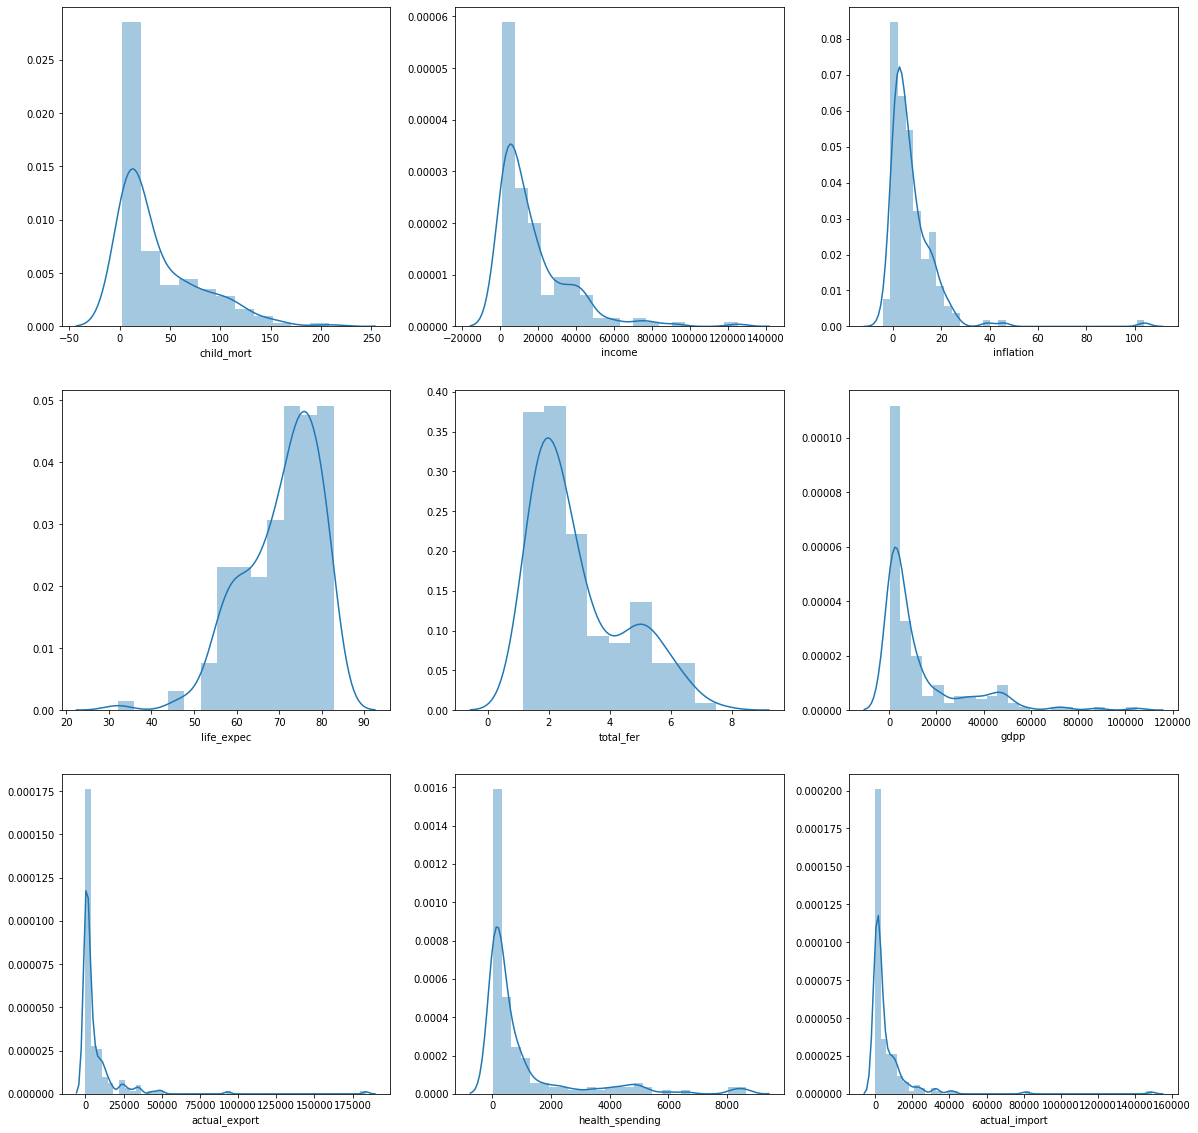

In [18]:
plt.figure(figsize=(20,20))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df[i[1]])

In [19]:
# We can see that child mortality majorly lies in the range 0-150 and peaks around 0-30
# Net income majorly lies in range 0-60000 per person and 0-20000 
# Life expectancy in most of the countries lies in the range 50-80
# gdpp peaks around 0- 5000
# Health spending in most of the countries is around 0- 1000

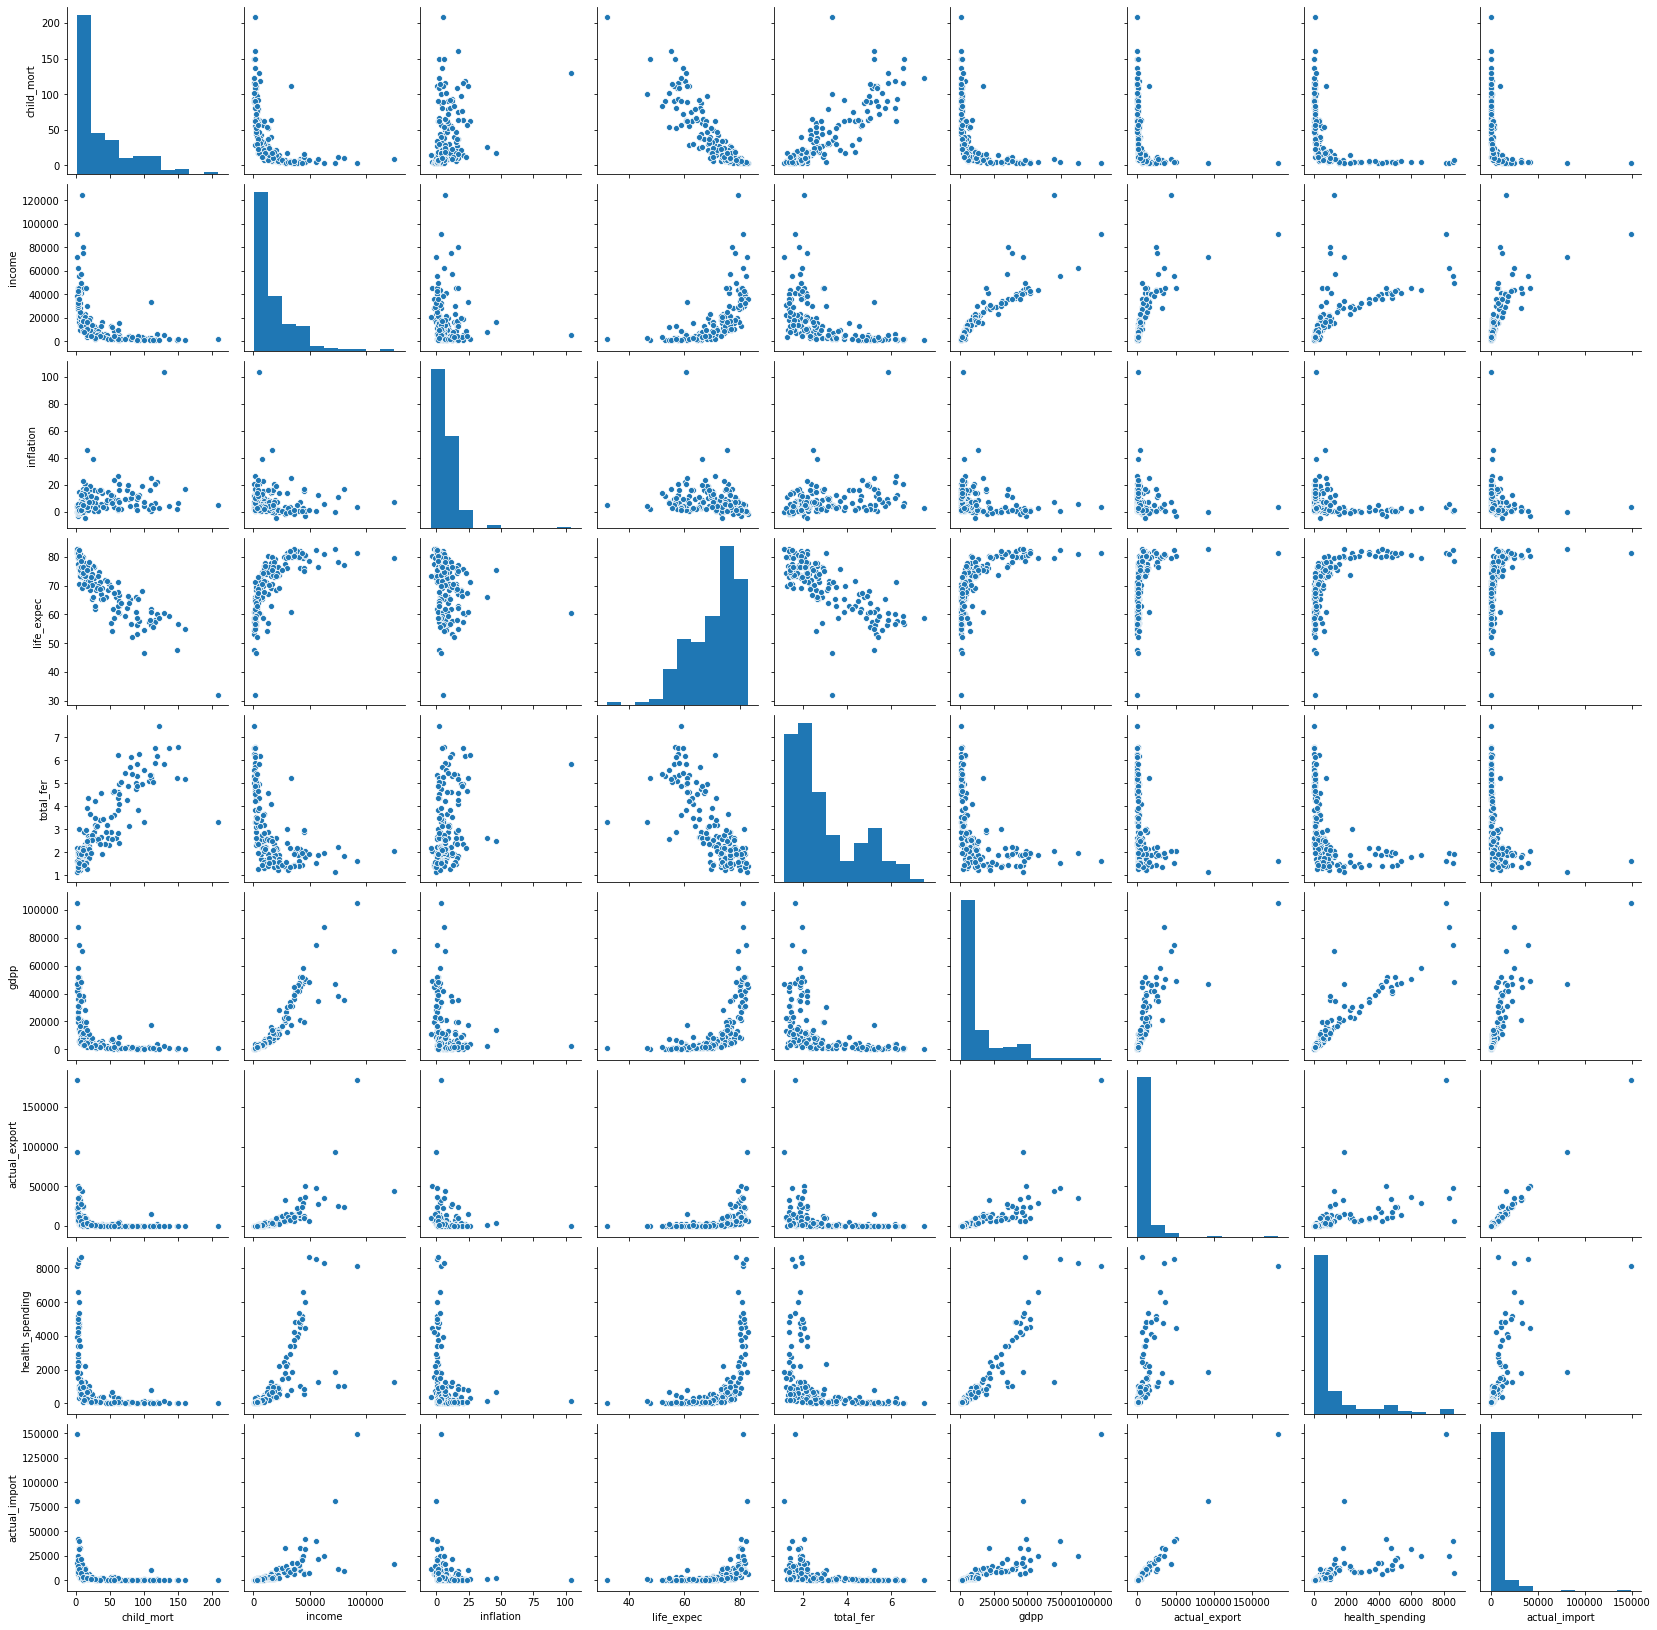

In [20]:
# We can also plot pair plot to see how different variables are related to each other
sns.pairplot(country_df)
plt.show()


In [ ]:
# There is some linear relationship between total_fer and child_mort other than that we do not see any such relations 

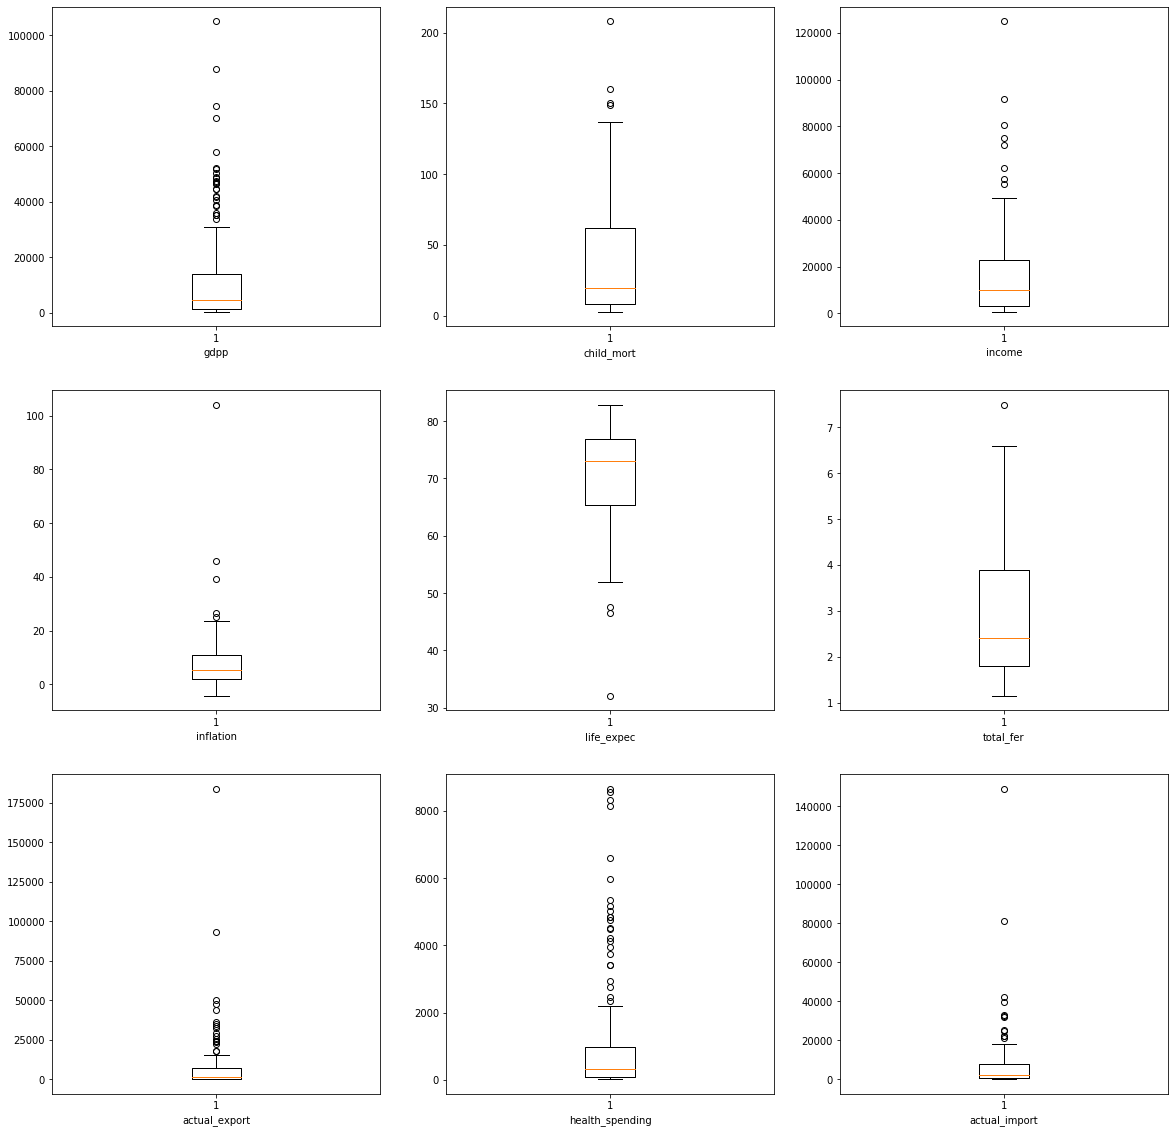

In [21]:
# Let's plot box plot for each variables to see if there is any outliers 
# Outlier treatment
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.boxplot(country_df['gdpp'])
plt.xlabel("gdpp")
plt.subplot(3,3,2)
plt.boxplot(country_df['child_mort'])
plt.xlabel("child_mort")
plt.subplot(3,3,3)
plt.boxplot(country_df['income'])
plt.xlabel("income")
plt.subplot(3,3,4)
plt.boxplot(country_df['inflation'])
plt.xlabel("inflation")
plt.subplot(3,3,5)
plt.boxplot(country_df['life_expec'])
plt.xlabel("life_expec")
plt.subplot(3,3,6)
plt.boxplot(country_df['total_fer'])
plt.xlabel("total_fer")
plt.subplot(3,3,7)
plt.boxplot(country_df['actual_export'])
plt.xlabel("actual_export")
plt.subplot(3,3,8)
plt.boxplot(country_df['health_spending'])
plt.xlabel("health_spending")
plt.subplot(3,3,9)
plt.boxplot(country_df['actual_import'])
plt.xlabel("actual_import")
plt.show()

In [ ]:
# Outliers can be seen in almost all variables. We will not touch lower quantile on any variable except child_mort
# All other but child_mort is useful for our analysis, we will apply upper capping in all ther variables. 

In [22]:
# Outlier capping for gdpp
q1 = country_df['gdpp'].quantile(.99)
country_df['gdpp'][country_df['gdpp']>=q1] =q1

In [23]:
# Outlier capping for child_mort
# Here we have capped the lower quantile as we need countries with high child mortality rate 
q2 =country_df['child_mort'].quantile(.01)
country_df['child_mort'][country_df['child_mort']<=q2] =q2

In [24]:
# Outlier capping for income
q3 = country_df['income'].quantile(.99)
country_df['income'][country_df['income']>=q3] =q3

In [25]:
# Outlier capping for health_spending
q4 = country_df['health_spending'].quantile(.99)
country_df['health_spending'][country_df['health_spending']>=q4] =q4

In [26]:
# Outlier capping for actual_export
q5 = country_df['actual_export'].quantile(.99)
country_df['actual_export'][country_df['actual_export']>=q5] =q5

In [27]:
# Outlier capping for actual_import
q6 = country_df['actual_import'].quantile(.99)
country_df['actual_import'][country_df['actual_import']>=q6] =q6


In [28]:
# Outlier capping for life_expec
q7 = country_df['life_expec'].quantile(.99)
country_df['life_expec'][country_df['life_expec']>=q7] =q7

In [29]:
# Outlier capping for inflation
q8 = country_df['inflation'].quantile(.99)
country_df['inflation'][country_df['inflation']>=q8] =q8

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(country_df.drop('country',axis=1))

0.9104233524763493

In [32]:
# A Hopkinsscore of around .88 indicates that there is good clustering tendancy present in our data

In [35]:
pd.set_option('display.max_rows',50)
country_df.head(10)


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import
0,Afghanistan,90.2,1610.0,9.440,56.2,5.82,553.0,55.30,41.9174,248.297
1,Albania,16.6,9930.0,4.490,76.3,1.65,4090.0,1145.20,267.8950,1987.740
2,Algeria,27.3,12900.0,16.100,76.5,2.89,4460.0,1712.64,185.9820,1400.440
3,Angola,119.0,5900.0,22.400,60.1,6.16,3530.0,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100.0,1.440,76.8,2.13,12200.0,5551.00,735.6600,7185.800
5,Argentina,14.5,18700.0,20.900,75.8,2.37,10300.0,1946.70,834.3000,1648.000
6,Armenia,18.1,6700.0,7.770,73.3,1.69,3220.0,669.76,141.6800,1458.660
7,Australia,4.8,41400.0,1.160,82.0,1.93,51900.0,10276.20,4530.8700,10847.100
8,Austria,4.3,43200.0,0.873,80.5,1.44,46900.0,24059.70,5159.0000,22418.200
9,Azerbaijan,39.2,16000.0,13.800,69.1,1.92,5840.0,3171.12,343.3920,1208.880


In [38]:
country_scaled = country_df[['child_mort','income','inflation','life_expec','total_fer','gdpp','actual_export','health_spending','actual_import']]
country_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import
0,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,41.9174,248.297
1,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,267.8950,1987.740
2,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,185.9820,1400.440
3,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,100.6050,1514.370
4,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,735.6600,7185.800


In [39]:
# instantiate
scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(country_scaled) # gives output as array
country_df_scaled.shape

(167, 9)

In [44]:
#First convert the numpy array that you have to a dataframe
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort','income','inflation','life_expec','total_fer','gdpp','actual_export','health_spendin','actual_import']

In [45]:
country_df_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spendin,actual_import
0,1.291537,-0.851668,0.265002,-1.619705,1.902882,-0.702259,-0.569622,-0.566958,-0.598741
1,-0.538993,-0.386946,-0.372075,0.648831,-0.859973,-0.498726,-0.473858,-0.440393,-0.413584
2,-0.272870,-0.221053,1.122161,0.671403,-0.038404,-0.477434,-0.424000,-0.486271,-0.476100
3,2.007831,-0.612045,1.932987,-1.179541,2.128151,-0.530950,-0.381249,-0.534088,-0.463973
4,-0.695682,0.125254,-0.764618,0.705262,-0.541946,-0.032042,-0.086742,-0.178410,0.139728


### Step 3: Modelling

In [46]:
# Instantiate KMeans
kmeans = KMeans(n_clusters=4, max_iter=50, random_state= 1000 )
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1000, tol=0.0001, verbose=0)

In [48]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       3, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 3, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       3, 0, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 3, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 3, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

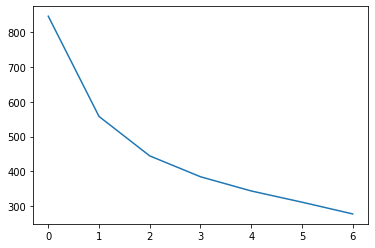

In [49]:
# Elbow curve/ Sum of squared distances
ssd=[]
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 1000)
    kmeans.fit(country_df_scaled)
     
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_cluster
plt.plot(ssd)

In [ ]:
# From the elbow curve it is evident that we can go with k=3, but before that let's do Shilhouette analysis to confirm our decision 

In [50]:
# Silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters: 
    # initialize KMeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 1000)
    kmeans.fit(country_df_scaled)
    
    cluster_labels= kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is{1}".format(num_clusters,silhouette_avg ))
    

For n_clusters=2, the silhouette score is0.4694123891254897
For n_clusters=3, the silhouette score is0.40279930937779956
For n_clusters=4, the silhouette score is0.3912566306520762
For n_clusters=5, the silhouette score is0.38352275105125766
For n_clusters=6, the silhouette score is0.2965244229098189
For n_clusters=7, the silhouette score is0.30823764291179784
For n_clusters=8, the silhouette score is0.31727472093581366


In [ ]:
# from silhouette score it can be seen that the score is decreasing as the number of clusters increases. 
# K=3 is a wise choice to go forward keeping elbow curve and silhouette analysis in mind. 

In [51]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state= 1000)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1000, tol=0.0001, verbose=0)

In [52]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [53]:
# assign the labels
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import,cluster_id
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,41.9174,248.297,2
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,267.8950,1987.740,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,185.9820,1400.440,1
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,100.6050,1514.370,2
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,735.6600,7185.800,1


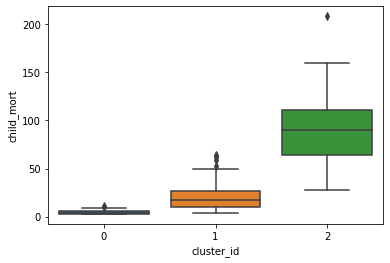

In [54]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)
plt.show()

In [ ]:
# We can see that cluster_id 2 has countries with high child mortality rate 

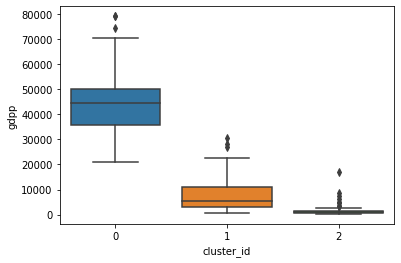

In [55]:
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)
plt.show()

In [ ]:
# Here cluster 0 contains countries with high gdpp or we can say that this cluster contains developed countries
# In cluster 2 we have countries low gdpp or under developed and poor countries 

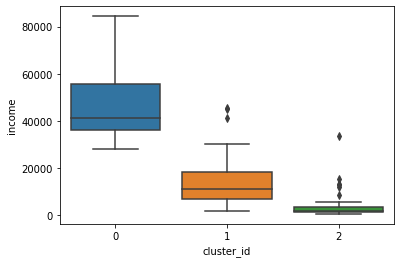

In [56]:
sns.boxplot(x='cluster_id', y='income', data=country_df)
plt.show()

In [ ]:
# From this graph also it is evident that cluster 0 is countries with high income per person or developed countries
# while cluster 2 is under developed or poor countries. 

In [72]:
country_df.cluster_id.value_counts()

1    90
2    48
0    29
Name: cluster_id, dtype: int64

In [ ]:
# We can see the break up of different clusters 

#### Cluster profiling 

In [58]:
country_df[country_df['cluster_id']==2].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import,cluster_id
26,Burundi,93.6,764.0,12.300,57.7,6.26,231.0,20.6052,26.7960,90.552,2
88,Liberia,89.3,700.0,5.470,60.8,5.02,327.0,62.4570,38.5860,302.802,2
37,"Congo, Dem. Rep.",116.0,609.0,20.800,57.5,6.54,334.0,137.2740,26.4194,165.664,2
112,Niger,123.0,814.0,2.550,58.8,7.49,348.0,77.2560,17.9568,170.868,2
132,Sierra Leone,160.0,1220.0,17.200,55.0,5.20,399.0,67.0320,52.2690,137.655,2
93,Madagascar,62.2,1390.0,8.790,60.8,4.60,413.0,103.2500,15.5701,177.590,2
106,Mozambique,101.0,918.0,7.640,54.5,5.56,419.0,131.9850,21.8299,193.578,2
31,Central African Republic,149.0,888.0,2.010,47.5,5.21,446.0,52.6280,17.7508,118.190,2
94,Malawi,90.5,1030.0,12.100,53.1,5.31,459.0,104.6520,30.2481,160.191,2
50,Eritrea,55.2,1420.0,11.600,61.7,4.61,482.0,23.0878,12.8212,112.306,2


In [ ]:
# As per the business requirement we only need countries with cluster_id =2 i.e. countries with high child_mort
# low gdpp and low income i.e we need to choose countries where there is high poverty hence cluster 2  

#### The following are the top 5 countries where HELP International can focus as per K-mean Model
-  Burundi
-  Liberia
-  Congo, Dem. Rep.
-  Niger
-  Sierra Leone

### Hierarchial clustering

In [60]:
country_df_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spendin,actual_import
0,1.291537,-0.851668,0.265002,-1.619705,1.902882,-0.702259,-0.569622,-0.566958,-0.598741
1,-0.538993,-0.386946,-0.372075,0.648831,-0.859973,-0.498726,-0.473858,-0.440393,-0.413584
2,-0.272870,-0.221053,1.122161,0.671403,-0.038404,-0.477434,-0.424000,-0.486271,-0.476100
3,2.007831,-0.612045,1.932987,-1.179541,2.128151,-0.530950,-0.381249,-0.534088,-0.463973
4,-0.695682,0.125254,-0.764618,0.705262,-0.541946,-0.032042,-0.086742,-0.178410,0.139728


In [61]:
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import,cluster_id
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,41.9174,248.297,2
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,267.8950,1987.740,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,185.9820,1400.440,1
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,100.6050,1514.370,2
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,735.6600,7185.800,1


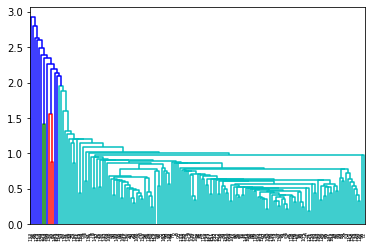

In [62]:
# Single Linkage 
mergings = linkage(country_df_scaled, method= "single" , metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# We can not make much sense out of this hence we will also try complete linkage

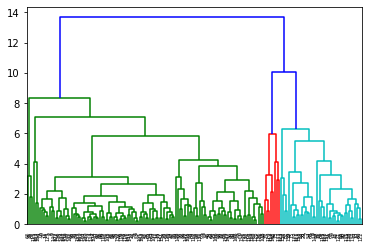

In [63]:
# Complete linkage
mergings = linkage(country_df_scaled, method= "complete" , metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# Here we can see that there are 3 visible clusters

In [64]:
# 3 clusters
cluster_labels= cut_tree(mergings, n_clusters=3).reshape(-1, ) 
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [66]:
country_df['cluster_labels'] = cluster_labels
country_df.head(20) # cluster_id we have assigned through kmeans while cluster_labels are assigned through hierarchial 

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import,cluster_id,cluster_labels
0,Afghanistan,90.2,1610.0,9.440,56.2,5.82,553.0,55.300,41.9174,248.297,2,0
1,Albania,16.6,9930.0,4.490,76.3,1.65,4090.0,1145.200,267.8950,1987.740,1,0
2,Algeria,27.3,12900.0,16.100,76.5,2.89,4460.0,1712.640,185.9820,1400.440,1,0
3,Angola,119.0,5900.0,22.400,60.1,6.16,3530.0,2199.190,100.6050,1514.370,2,0
4,Antigua and Barbuda,10.3,19100.0,1.440,76.8,2.13,12200.0,5551.000,735.6600,7185.800,1,1
5,Argentina,14.5,18700.0,20.900,75.8,2.37,10300.0,1946.700,834.3000,1648.000,1,0
6,Armenia,18.1,6700.0,7.770,73.3,1.69,3220.0,669.760,141.6800,1458.660,1,0
7,Australia,4.8,41400.0,1.160,82.0,1.93,51900.0,10276.200,4530.8700,10847.100,0,1
8,Austria,4.3,43200.0,0.873,80.5,1.44,46900.0,24059.700,5159.0000,22418.200,0,1
9,Azerbaijan,39.2,16000.0,13.800,69.1,1.92,5840.0,3171.120,343.3920,1208.880,1,0


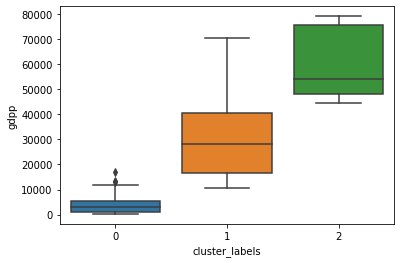

In [67]:
# plots
sns.boxplot(x='cluster_labels', y= 'gdpp', data = country_df)
plt.show()

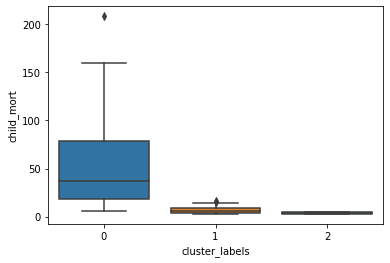

In [68]:
sns.boxplot(x='cluster_labels', y= 'child_mort', data = country_df)
plt.show()

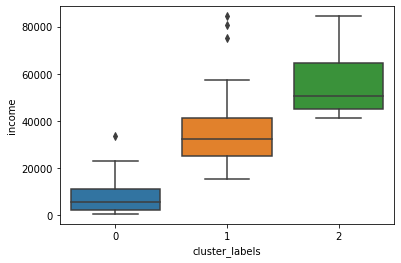

In [69]:
sns.boxplot(x='cluster_labels', y= 'income', data = country_df)
plt.show()

In [ ]:
# Here from the graph it is visble that out target cluster is 0, having low gdpp, low ncome and high child_mort

In [73]:
# to see the breakup of different clusters.
country_df.cluster_labels.value_counts()

0    118
1     41
2      8
Name: cluster_labels, dtype: int64

In [70]:
country_df[country_df['cluster_labels']==0].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,actual_export,health_spending,actual_import,cluster_id,cluster_labels
26,Burundi,93.6,764.0,12.300,57.7,6.26,231.0,20.6052,26.7960,90.552,2,0
88,Liberia,89.3,700.0,5.470,60.8,5.02,327.0,62.4570,38.5860,302.802,2,0
37,"Congo, Dem. Rep.",116.0,609.0,20.800,57.5,6.54,334.0,137.2740,26.4194,165.664,2,0
112,Niger,123.0,814.0,2.550,58.8,7.49,348.0,77.2560,17.9568,170.868,2,0
132,Sierra Leone,160.0,1220.0,17.200,55.0,5.20,399.0,67.0320,52.2690,137.655,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22,Brazil,19.8,14500.0,8.410,74.2,1.80,11200.0,1198.4000,1009.1200,1321.600,1,0
160,Uruguay,10.6,17100.0,4.910,76.4,2.08,11900.0,3129.7000,993.6500,3022.600,1,0
33,Chile,8.7,19400.0,8.960,79.1,1.88,12900.0,4863.3000,1026.8400,4037.700,1,0
163,Venezuela,17.1,16500.0,41.478,75.4,2.47,13500.0,3847.5000,662.8500,2376.000,1,0


### The top 5 countries as per Hirearchial model where HELP International can focus
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

### We can notice that the top 5 countries from both the models are same

#### Hence HELP International can focus on these 5 countries and allocate it's fund accordingly to help these countries fight poverty and to improve health aminities 